# Selection of event in Tlpk and Tlds

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import csth.utils.photopeak_fit as pk

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [3]:
def plottext(res, cov, n):
    mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
    mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
    s, ss     = res.x[2], cov[2][2]**.5
    mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
    sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

    tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
            fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
            fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
            fr'$\sigma   = {sig} \pm {ssig}$' + '\n'+
            fr'Total Entries: {n}')
    return tres


def fitplot(E, lims, res, cov, nbins):
    a, b =lims
    fig = plt.figure()
    ax = fig.add_subplot(111)

    h, _, _ = ax.hist(E, bins=int(nbins), alpha=0.5, histtype='step', color='darkblue', linewidth=2);
    e = np.linspace(a, b, 1000)
    ax.plot(e, ((b-a)/nbins*len(E))*pk.pkpdf(e, res.x, [a,b]), c='black')

    ax.text(a, h.max()/2., s=plottext(res, cov, len(E)))

    ax.set_xlabel('Energy (pes)');
    ax.set_ylabel('Entries');

In [4]:
run = 6485

directory = '../../DATA/'
filename  = f'cepks_{run}_0000_11999_6q0min.h5'

data = pd.HDFStore(directory + filename)['/esum']

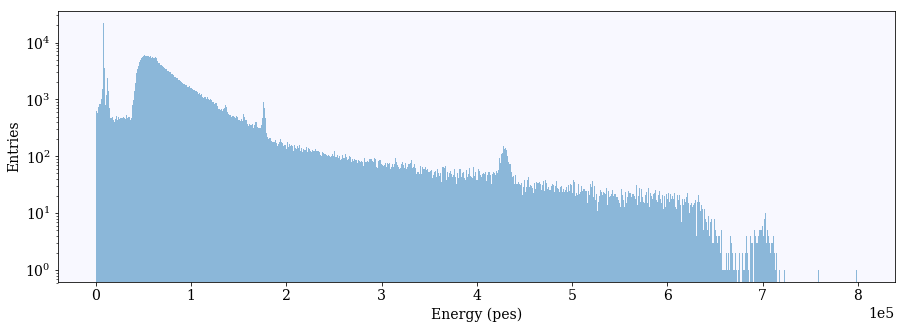

In [5]:
E = data[(data['e']<8e5)]['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(10*nbins), log=True, alpha=0.5);
ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Th photopeak

In [6]:
a, b = 6.6e5, 7.3e5

thpk = data[(a<data['e'])&(data['e']<b)]

In [7]:
E = thpk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)


Optimization terminated successfully.
         Current function value: 2670.146387
         Iterations: 14
         Function evaluations: 1651


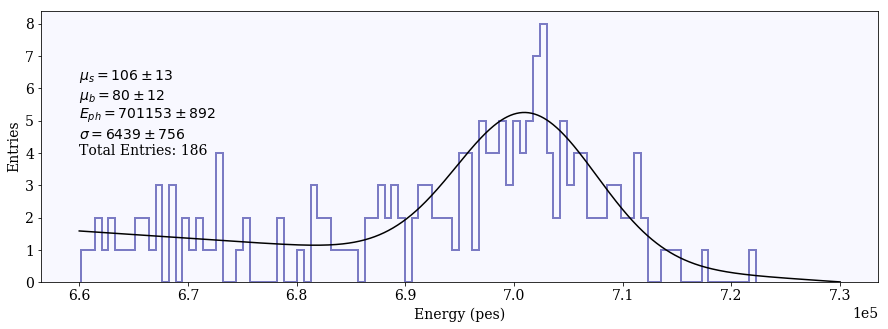

In [8]:
fitplot(E, [a, b], res, cov, nbins)

In [9]:
np.save(f'Tlpk_run{run}.npy' ,thpk['event'].values)

# Th double escape

In [10]:
a, b = 4.1e5, 4.45e5

thds = data[(a<data['e'])&(data['e']<b)]

In [11]:
E = thds['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

Optimization terminated successfully.
         Current function value: 45117.070349
         Iterations: 19
         Function evaluations: 2127


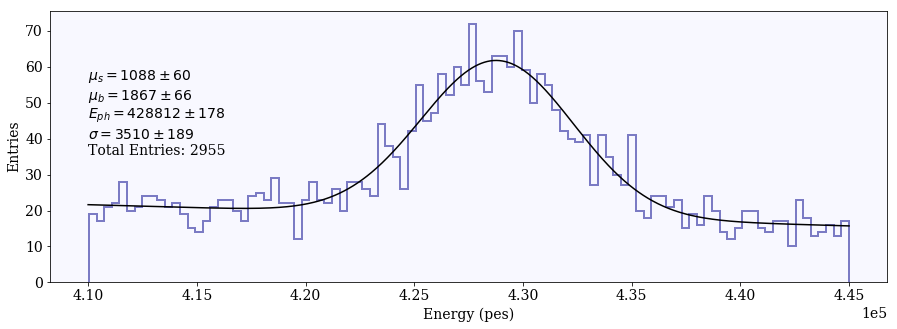

In [12]:
fitplot(E, [a, b], res, cov, nbins)

In [13]:
np.save(f'Tlds_run{run}.npy' ,thds['event'].values)